## **1. Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
from sklearn.model_selection import train_test_split

## **2. Load The Cleaned Dataset**

In [2]:
df = pd.read_csv("../data/processed/cleaned_news.csv")

## **3. Inspect The Dataset**

In [3]:
df.head()

,title,text,label,content,cleaned_content,tokens
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,no comment is expected from barack obama membe...,comment expected barack obama members fyf fuky...,"['comment', 'expected', 'barack', 'obama', 'me..."
1,NaN,Did they post their votes for Hillary already?,1,did they post their votes for hillary already,post votes hillary already,"['post', 'votes', 'hillary', 'already']"
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,now most of the demonstrators gathered last ni...,demonstrators gathered last night exercising c...,"['demonstrators', 'gathered', 'last', 'night',..."
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,a dozen politically active pastors came here f...,dozen politically active pastors came private ...,"['dozen', 'politically', 'active', 'pastors', ..."
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,the rs sarmat missile dubbed satan will replac...,rs sarmat missile dubbed satan replace ss flie...,"['rs', 'sarmat', 'missile', 'dubbed', 'satan',..."


## **4. Define Features and Target Variable**

In [4]:
# Change to 'content' if that is your column name
X = df['cleaned_content']
y = df['label']
X
y

0        1
1        1
2        1
3        0
4        1
        ..
72129    0
72130    1
72131    0
72132    0
72133    1
Name: label, Length: 72134, dtype: int64

## **5. Handle Missing Values**

In [5]:
X = X.fillna("")

## **6. Train-Test Split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## **6. Load Saved TF-IDF Vectorizer**

In [7]:
tfidf = joblib.load("../backend/vectorizer.pkl")

## **7. Transform Test Data Using TF-IDF**

In [8]:
X_test_tfidf = tfidf.transform(X_test)
X_test_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2469688 stored elements and shape (14427, 10000)>

## **8. Load Trained Model**

In [9]:
model = joblib.load("../backend/model.pkl")

## **9. Generate Pridictions**

In [10]:
y_pred = model.predict(X_test_tfidf)
y_pred

array([1, 1, 0, ..., 1, 1, 0], shape=(14427,))

## **10. Classification Metrics: Precision,Recall,F1-Score**

In [11]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7006
           1       0.95      0.97      0.96      7421

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



## **11. Calculate Individual Evaluation Metrics**

In [12]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")

Accuracy  : 0.9579
Precision : 0.9529
Recall    : 0.9658
F1-Score  : 0.9593


## **12. Campute Confusion Matrix**

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6652,  354],
       [ 254, 7167]])

## **13. Visualize Confusion Matrix**

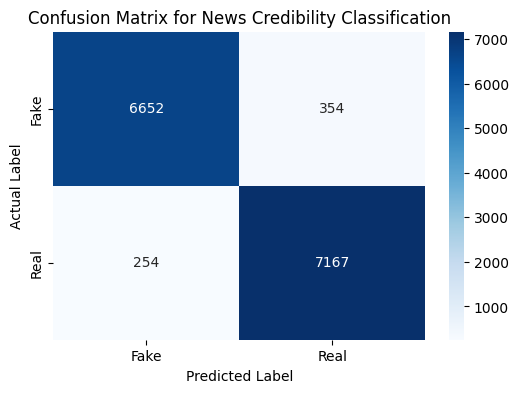

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])

plt.title("Confusion Matrix for News Credibility Classification")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

## **14. Interpretation of Confusion Matrix**

- True Positives (TP): Correctly predicted real news  
- True Negatives (TN): Correctly predicted fake news  
- False Positives (FP): Fake news predicted as real  
- False Negatives (FN): Real news predicted as fake  

A lower number of false positives and false negatives indicates a more reliable credibility classification model.

## **15. Model Performance Summary**

The model demonstrates strong performance in classifying news articles based on credibility.
Evaluation metrics such as Precision, Recall, and F1-Score indicate the model's ability
to correctly identify both real and fake news articles while minimizing misclassification.

The confusion matrix further validates that the model maintains a balanced prediction
across both classes, making it suitable for misinformation risk detection.

## **15. Conclusion**

In this evaluation phase, the trained Logistic Regression model was assessed using
standard classification metrics including Accuracy, Precision, Recall, F1-Score,
and Confusion Matrix as required by the project specifications.

The results confirm that the model is effective for credibility classification
and can be integrated into the user interface for real-time news analysis in
Milestone 1.